# BANK LOAN ANALYSIS REPORT

##### Installing Required Libraries

In [55]:
!pip install pandas
!pip install numpy
!pip install matplotlib
!pip install seaborn
!pip install scikit-learn
!pip install warnings
!pip install plotly

ERROR: Could not find a version that satisfies the requirement warnings (from versions: none)
ERROR: No matching distribution found for warnings


## Importing Libraries

In [56]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import plotly.express as px

# Loading of data "Excel File"

In [57]:
df = pd.read_excel("financial_loan.xlsx")


##### Confirming data is loaded correctly

In [58]:
df.head()

,id,address_state,application_type,emp_length,emp_title,grade,home_ownership,issue_date,last_credit_pull_date,last_payment_date,...,sub_grade,term,verification_status,annual_income,dti,installment,int_rate,loan_amount,total_acc,total_payment
0,1077430,GA,INDIVIDUAL,< 1 year,Ryder,C,RENT,2021-02-11,2021-09-13,2021-04-13,...,C4,60 months,Source Verified,30000.0,0.0100,59.83,0.1527,2500,4,1009
1,1072053,CA,INDIVIDUAL,9 years,MKC Accounting,E,RENT,2021-01-01,2021-12-14,2021-01-15,...,E1,36 months,Source Verified,48000.0,0.0535,109.43,0.1864,3000,4,3939
2,1069243,CA,INDIVIDUAL,4 years,Chemat Technology Inc,C,RENT,2021-01-05,2021-12-12,2021-01-09,...,C5,36 months,Not Verified,50000.0,0.2088,421.65,0.1596,12000,11,3522
3,1041756,TX,INDIVIDUAL,< 1 year,barnes distribution,B,MORTGAGE,2021-02-25,2021-12-12,2021-03-12,...,B2,60 months,Source Verified,42000.0,0.0540,97.06,0.1065,4500,9,4911
4,1068350,IL,INDIVIDUAL,10+ years,J&J Steel Inc,A,MORTGAGE,2021-01-01,2021-12-14,2021-01-15,...,A1,36 months,Verified,83000.0,0.0231,106.53,0.0603,3500,28,3835


## Metadata of the Data

In [59]:
print("No. of Rows: ", df.shape[0])
print("No. of Columns: ", df.shape[1])

No. of Rows:  38576
No. of Columns:  24


In [60]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38576 entries, 0 to 38575
Data columns (total 24 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   id                     38576 non-null  int64         
 1   address_state          38576 non-null  object        
 2   application_type       38576 non-null  object        
 3   emp_length             38576 non-null  object        
 4   emp_title              37138 non-null  object        
 5   grade                  38576 non-null  object        
 6   home_ownership         38576 non-null  object        
 7   issue_date             38576 non-null  datetime64[ns]
 8   last_credit_pull_date  38576 non-null  datetime64[ns]
 9   last_payment_date      38576 non-null  datetime64[ns]
 10  loan_status            38576 non-null  object        
 11  next_payment_date      38576 non-null  datetime64[ns]
 12  member_id              38576 non-null  int64         
 13  p

 No Null values found!  
 All data is in correct format!

### Data Types


In [61]:
df.dtypes

id                                int64
address_state                    object
application_type                 object
emp_length                       object
emp_title                        object
grade                            object
home_ownership                   object
issue_date               datetime64[ns]
last_credit_pull_date    datetime64[ns]
last_payment_date        datetime64[ns]
loan_status                      object
next_payment_date        datetime64[ns]
member_id                         int64
purpose                          object
sub_grade                        object
term                             object
verification_status              object
annual_income                   float64
dti                             float64
installment                     float64
int_rate                        float64
loan_amount                       int64
total_acc                         int64
total_payment                     int64
dtype: object

In [62]:
df.describe()

,id,issue_date,last_credit_pull_date,last_payment_date,next_payment_date,member_id,annual_income,dti,installment,int_rate,loan_amount,total_acc,total_payment
count,3.857600e+04,38576,38576,38576,38576,3.857600e+04,3.857600e+04,38576.000000,38576.000000,38576.000000,38576.000000,38576.000000,38576.000000
mean,6.810371e+05,2021-07-16 02:31:35.562007040,2021-06-08 13:36:34.193280512,2021-06-26 09:52:08.909166080,2021-07-26 20:42:20.605557760,8.476515e+05,6.964454e+04,0.133274,326.862965,0.120488,11296.066855,22.132544,12263.348533
min,5.473400e+04,2021-01-01 00:00:00,2021-01-08 00:00:00,2021-01-08 00:00:00,2021-02-08 00:00:00,7.069900e+04,4.000000e+03,0.000000,15.690000,0.054200,500.000000,2.000000,34.000000
25%,5.135170e+05,2021-04-11 00:00:00,2021-04-15 00:00:00,2021-03-16 00:00:00,2021-04-16 00:00:00,6.629788e+05,4.150000e+04,0.082100,168.450000,0.093200,5500.000000,14.000000,5633.000000
50%,6.627280e+05,2021-07-11 00:00:00,2021-05-16 00:00:00,2021-06-14 00:00:00,2021-07-14 00:00:00,8.473565e+05,6.000000e+04,0.134200,283.045000,0.118600,10000.000000,20.000000,10042.000000
75%,8.365060e+05,2021-10-11 00:00:00,2021-08-13 00:00:00,2021-09-15 00:00:00,2021-10-15 00:00:00,1.045652e+06,8.320050e+04,0.185900,434.442500,0.145900,15000.000000,29.000000,16658.000000
max,1.077501e+06,2021-12-12 00:00:00,2022-01-20 00:00:00,2021-12-15 00:00:00,2022-01-15 00:00:00,1.314167e+06,6.000000e+06,0.299900,1305.190000,0.245900,35000.000000,90.000000,58564.000000
std,2.113246e+05,NaN,NaN,NaN,NaN,2.668105e+05,6.429368e+04,0.066662,209.092000,0.037164,7460.746022,11.392282,9051.104777


## KPI

1. Total Loan Applications: We need to calculate the total number of loan applications received during a specified period. Additionally, it is essential to monitor the Month-to-Date (MTD) Loan Applications.  
  

2. Total Funded Amount: Understanding the total amount of funds disbursed as loans is crucial. We also want to keep an eye on the MTD Total Funded Amount metric.  


3. Total Amount Received: Tracking the total amount received from borrowers is essential for assessing the bank's cash flow and loan repayment. We should analyse the Month-to-Date (MTD) Total Amount Receive.  
  

4. Average Interest Rate: Calculating the average interest rate across all loans which will provide insights into our lending portfolio's overall cost.  
  

5. Average Debt to Income Ratio (DTI): Evaluating the average DTI for our borrowers helps us gauge their financial health. We need to compute the average DTI for all loans.

### Total Loan Applications

In [63]:
total_loan_application = df['id'].count()
print("Total Loan Applications: ", total_loan_application)

Total Loan Applications:  38576


##### Month-to-Data (MTD) Loan Applications  
  
Depending upon when the aalysis is being conducted, **the current month** is taken for the analysis.  

In [64]:
latest_issue_date = df["issue_date"].max()
latest_year = latest_issue_date.year
latest_month = latest_issue_date.month

mtd_data = df[(df['issue_date'].dt.year == latest_year) & (df['issue_date'].dt.month == latest_month)]
mtd_loan_application = mtd_data['id'].count()


##### Simple command

In [65]:
print("MTD Loan Applications: ", mtd_loan_application)

MTD Loan Applications:  4314


##### Dynamic command, wherein calculates the lastest date by self

In [66]:
print(f"MTD Loan Application (for {latest_issue_date.strftime('%B %Y')}) : {mtd_loan_application}")

MTD Loan Application (for December 2021) : 4314


### Total Funded Amount

In [67]:
total_funded_amount = df["loan_amount"].sum()
print("Total Funded Amount: ", total_funded_amount)

Total Funded Amount:  435757075


To get the amount in terms of Millions

In [68]:
total_funded_amount = df["loan_amount"].sum()
total_funded_amount_millions = total_funded_amount / 1000000
print("Total Funded Amount: ", total_funded_amount_millions, "Millions")

Total Funded Amount:  435.757075 Millions


To get the amount in terms of Millions, with 2 Decimal places

In [69]:
total_funded_amount = df["loan_amount"].sum()
total_funded_amount_millions = total_funded_amount / 1000000
print("Total Funded Amount: ${:.2f} M". format(total_funded_amount_millions))

Total Funded Amount: $435.76 M


##### MTD Total Amount Funded

In [70]:
latest_issue_date = df["issue_date"].max()
latest_year = latest_issue_date.year
latest_month = latest_issue_date.month

mtd_data = df[(df['issue_date'].dt.year == latest_year) & (df['issue_date'].dt.month == latest_month)]

mtd_total_funded_amount = mtd_data["loan_amount"].sum()
mtd_total_funded_amount_millions = mtd_total_funded_amount / 1000000
print("MTD Total Funded Amount (for {}): ${:.2f} M".format(latest_issue_date.strftime('%B %Y'), mtd_total_funded_amount_millions))


MTD Total Funded Amount (for December 2021): $53.98 M


### Total Amount Received

In [71]:
total_amount_received = df["total_payment"].sum()
total_amount_received_millions = total_amount_received / 1000000
print("Total Amount Received: ${:.2f} M". format (total_amount_received_millions))

Total Amount Received: $473.07 M


##### MTD Total Amount Received

In [72]:
latest_issue_date = df["issue_date"].max()
latest_year = latest_issue_date.year
latest_month = latest_issue_date.month

mtd_data = df[(df['issue_date'].dt.year == latest_year) & (df['issue_date'].dt.month == latest_month)]

mtd_total_amount_received = mtd_data["total_payment"].sum()
mtd_total_amount_received_millions = mtd_total_amount_received / 1000000
print("MTD Total Received Amount (for {}): ${:.2f} M".format(latest_issue_date.strftime('%B %Y'), mtd_total_amount_received_millions))


MTD Total Received Amount (for December 2021): $58.07 M


### Average Interest Rate

In [73]:
average_interest_date = df["int_rate"].mean()*100
print("Average Interest Rate: {:.2f} %".format(average_interest_date))

Average Interest Rate: 12.05 %


### Average Debt-to-Income Ratio (DTI)

In [74]:
average_dti = df["dti"].mean()*100
print("Average Debt-to-Income Ratio (DTI): {:.2f} %".format(average_dti))

Average Debt-to-Income Ratio (DTI): 13.33 %


### **Good Loan VS Bad Loan**

##### Good Loan  
- Loans with status as **Current**, as it is a source of Income.  
- Loans that are **Fully Paid**, as the amount is settled.
  
##### Bad Loan  
- Loans with status as **CHarged off**, as it is a liability

### Good Loan Metrics

In [ ]:
good_loans = df[df['loan_status'].isin(['Current', 'Fully Paid'])]

total_loan_applications = df['id'].count()

good_loan_applications = good_loans['id'].count()
good_loan_funded_amount = good_loans['loan_amount'].sum()
good_loan_received_amount = good_loans['total_payment'].sum()

good_loan_funded_amount = good_loan_funded_amount / 1000000
good_loan_received_amount = good_loan_received_amount / 1000000

good_loan_percentage = (good_loan_applications / total_loan_applications * 100) if total_loan_applications > 0 else 0

print("Total Loan Applications: ", total_loan_applications)
print("Good Loan Applications: ", good_loan_applications)
print("Good Loan Funded Amount: ${:.2f} M".format(good_loan_funded_amount))
print("Good Loan Received Amount: ${:.2f} M".format(good_loan_received_amount))
print("Good Loan Percentage: {:.2f} %".format(good_loan_percentage))        # Should be above 95%

Total Loan Applications:  38576
Good Loan Applications:  33243
Good Loan Funded Amount: $370.22 M
Good Loan Received Amount: $435.79 M
Good Loan Percentage: 86.18 %


### Bad Loans

In [91]:
bad_loans1 = df[df['loan_status'].isin(['Charged Off'])]

total_loan_applications = df['id'].count()

bad_loan_applications = bad_loans1['id'].count()
bad_loan_funded_amount = bad_loans1['loan_amount'].sum()
bad_loan_received_amount = bad_loans1['total_payment'].sum()

bad_loan_funded_amount = bad_loan_funded_amount / 1000000
bad_loan_received_amount = bad_loan_received_amount / 1000000

bad_loan_percentage = (bad_loan_applications / total_loan_applications * 100) if total_loan_applications > 0 else 0

print("Total Loan Applications: ", total_loan_applications)
print("Bad Loan Applications: ", bad_loan_applications)
print("Bad Loan Funded Amount: ${:.2f} M".format(bad_loan_funded_amount))
print("Bad Loan Received Amount: ${:.2f} M".format(bad_loan_received_amount))
print("Bad Loan Percentage: {:.2f} %".format(bad_loan_percentage))        # Should be under 5%

Total Loan Applications:  38576
Bad Loan Applications:  5333
Bad Loan Funded Amount: $65.53 M
Bad Loan Received Amount: $37.28 M
Bad Loan Percentage: 13.82 %


# ALTERNATIVELY

In [100]:
print("Total Loan Applications: ", total_loan_applications)
print("Bad Loan Applications: ", (total_loan_applications - good_loan_applications))
print("Bad Loan Funded Amount: ${:.2f} M".format((total_funded_amount_millions - good_loan_funded_amount)))
print("Bad Loan Received Amount: ${:.2f} M".format((total_amount_received_millions - good_loan_received_amount)))
print("Bad Loan Percentage: {:.2f} %".format((bad_loan_applications / total_loan_applications * 100) if total_loan_applications > 0 else 0))

Total Loan Applications:  38576
Bad Loan Applications:  5333
Bad Loan Funded Amount: $65.53 M
Bad Loan Received Amount: $37.28 M
Bad Loan Percentage: 13.82 %


## CHARTS  
### Problem Statement  

1. Monthly Trends by Issue Date (Line/ Area Chart):  To identify seasonality and long-term trends in lending activities. 

2. Regional Analysis by State (Bar Chart): To identify regions with significant lending activity and assess regional disparities.  
3. Loan Term Analysis (Donut Chart): To allow the client to understand the distribution of loans across various term lengths.  
4. Employee Length Analysis (Bar Chart): How lending metrics are distributed among borrowers with different employment lengths, helping us assess the impact of employment history on loan applications.  
5. Loan Purpose Breakdown (Bar Chart): Will provide a visual breakdown of loan metrics based on the stated purposes of loans, aiding in the understanding of the primary reasons borrowers seek financing.  
6. Home Ownership Analysis (Tree/ Heat Map): For a hierarchical view of how home ownership impacts loan applications and disbursements.


### Monthly Trends by Issue Date for Total Funded Amount

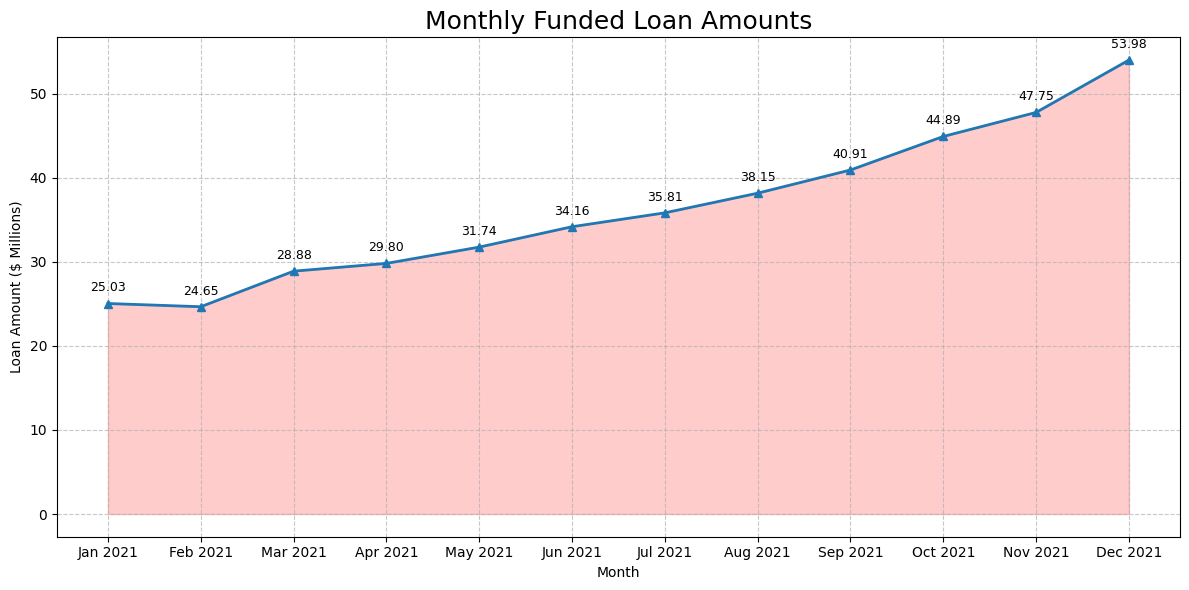

In [113]:
y = monthly_funded['loan_amount_millions']
labels = monthly_funded['month_name']

plt.figure(figsize=(12, 6))
plt.fill_between(labels, y, alpha=0.2, color='red')
plt.plot(labels, y, marker='^', linewidth=2)

# annotate directly using month names as x
for label, val in zip(labels, y):
    plt.text(label, val + 0.02 * y.max(), f"{val:.2f}",
             ha='center', va='bottom', fontsize=9)

plt.title('Monthly Funded Loan Amounts', fontsize=18)
plt.xlabel('Month')
plt.ylabel('Loan Amount ($ Millions)')
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


### Monthly Received Amounts

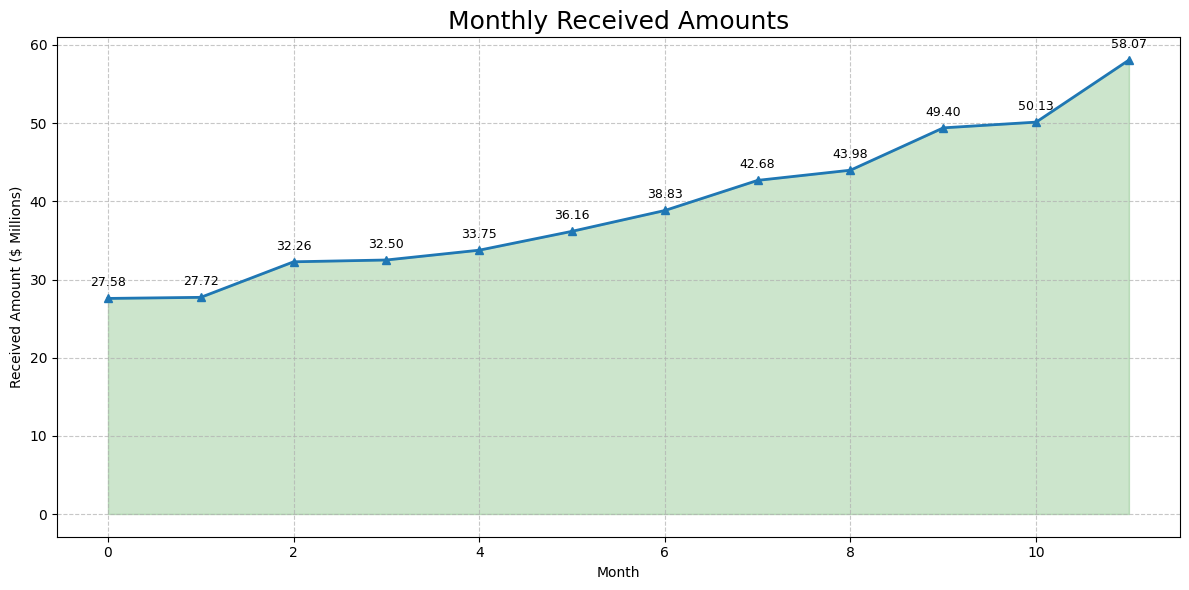

In [123]:
monthly_received = (
    df.sort_values(by='issue_date', ascending=True)
      .assign(month_name=lambda x: x['issue_date'].dt.strftime('%b %Y'))
      .groupby('month_name', sort=False)['total_payment']
      .sum()
      .div(1_000_000)  # convert to millions
      .reset_index(name='received_amount_millions')
)


y = monthly_received['received_amount_millions']
labels = monthly_received['month_name']# numeric positions 0,1,2,...

plt.figure(figsize=(12, 6))
plt.fill_between(x, y, alpha=0.2, color='green')   # numeric x here
plt.plot(x, y, marker='^', linewidth=2)

# annotate
for xi, val in zip(x, y):
    plt.text(xi, val + 0.02 * y.max(), f"{val:.2f}",
             ha='center', va='bottom', fontsize=9)

plt.title('Monthly Received Amounts', fontsize=18)
plt.xlabel('Month')
plt.ylabel('Received Amount ($ Millions)')
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


### Mothly Trends by Issue Date for Total Loan Applications

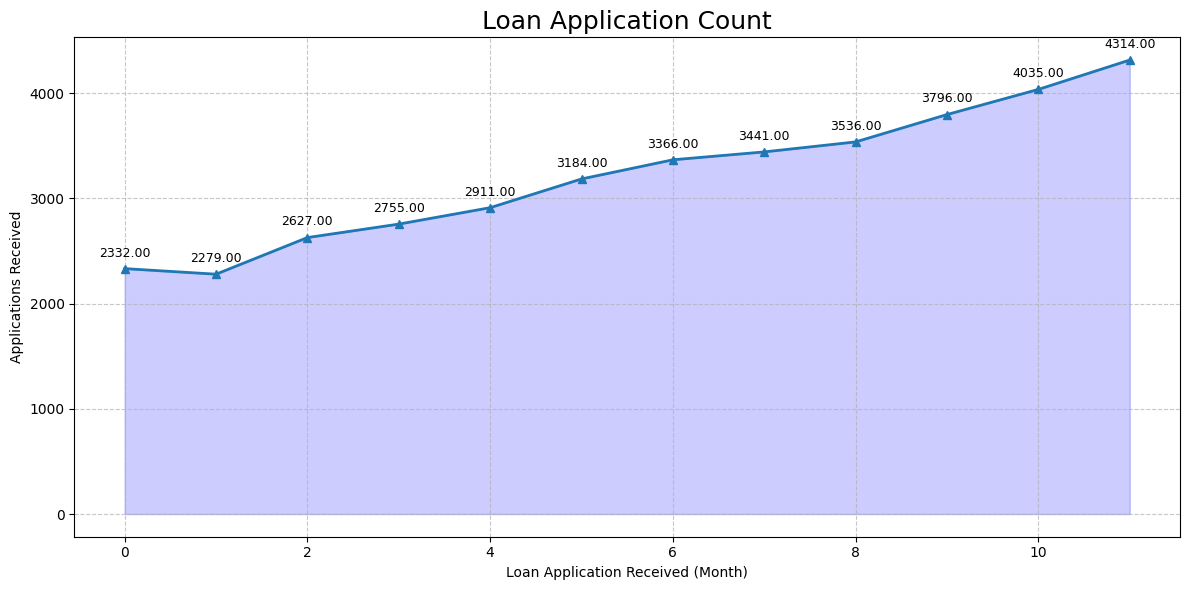

In [131]:
monthly_received = (
    df.sort_values(by='issue_date', ascending=True)
      .assign(month_name=lambda x: x['issue_date'].dt.strftime('%b %Y'))
      .groupby('month_name', sort=False)['id']
      .count()
      .reset_index(name='loan_application_count')
)


y = monthly_received['loan_application_count']
labels = monthly_received['month_name']# numeric positions 0,1,2,...

plt.figure(figsize=(12, 6))
plt.fill_between(x, y, alpha=0.2, color='blue')   # numeric x here
plt.plot(x, y, marker='^', linewidth=2)

# annotate
for xi, val in zip(x, y):
    plt.text(xi, val + 0.02 * y.max(), f"{val:.2f}",
             ha='center', va='bottom', fontsize=9)

plt.title('Loan Application Count', fontsize=18)
plt.xlabel('Loan Application Received (Month)')
plt.ylabel('Applications Received')
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


## Regional Analysis by State (Bar Chart)

### Total Funded Amount

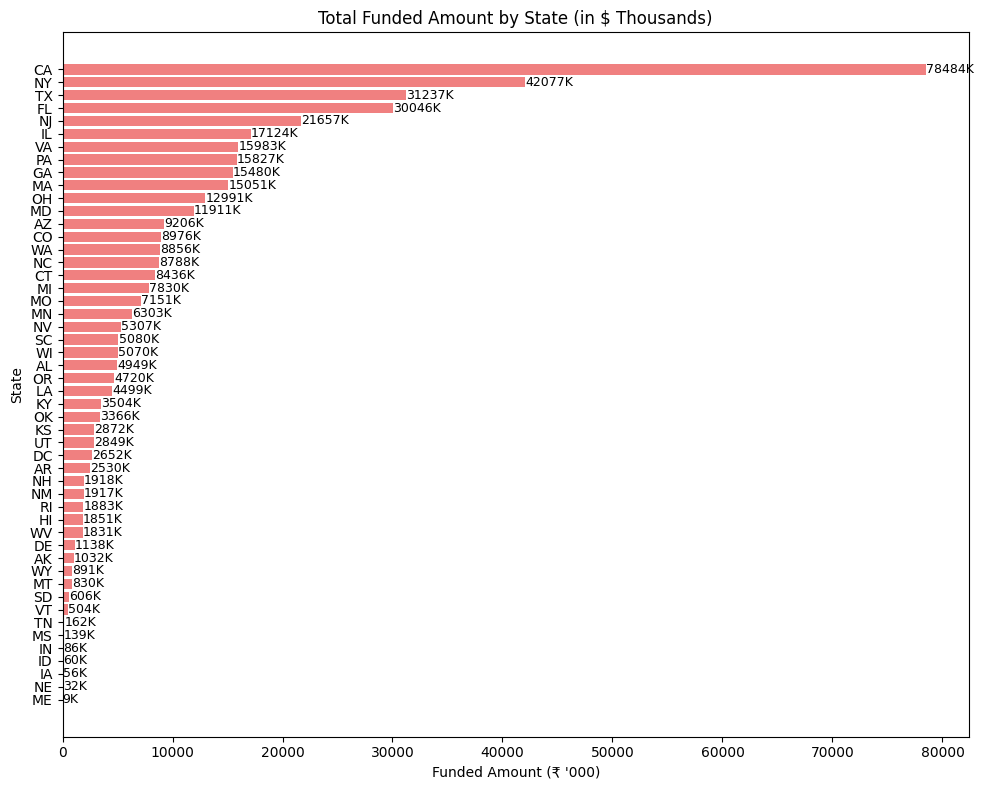

In [ ]:
state_funding = df.groupby('address_state')['loan_amount'].sum().sort_values(ascending=True)
state_funding_thousands = state_funding / 1000

plt.figure(figsize=(10, 8))
bars = plt.barh(state_funding_thousands.index, state_funding_thousands.values, color='lightcoral')

for bar in bars:
    width = bar.get_width()
    plt.text(width + 10, bar.get_y() + bar.get_height() / 2,
             f'{width:.0f}K', va='center', fontsize=9)

plt.title('Total Funded Amount by State (in $ Thousands)')
plt.xlabel("Funded Amount ($ '000)")
plt.ylabel('State')
plt.tight_layout()
plt.show()


### Total Amount Received

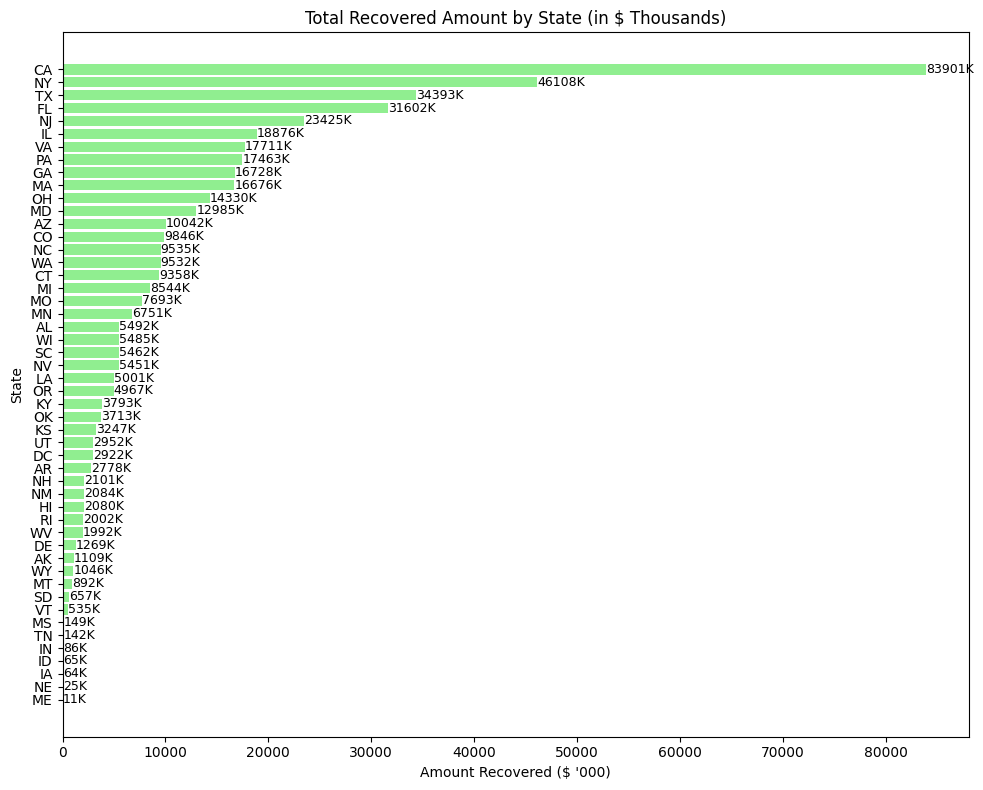

In [135]:
state_recovered = df.groupby('address_state')['total_payment'].sum().sort_values(ascending=True)
state_recovered_thousands = state_recovered / 1000

plt.figure(figsize=(10, 8))
bars = plt.barh(state_recovered_thousands.index, state_recovered_thousands.values, color='lightgreen')

for bar in bars:
    width = bar.get_width()
    plt.text(width + 10, bar.get_y() + bar.get_height() / 2,
             f'{width:.0f}K', va='center', fontsize=9)

plt.title('Total Recovered Amount by State (in $ Thousands)')
plt.xlabel("Amount Recovered ($ '000)")
plt.ylabel('State')
plt.tight_layout()
plt.show()


### Count of Amount Received

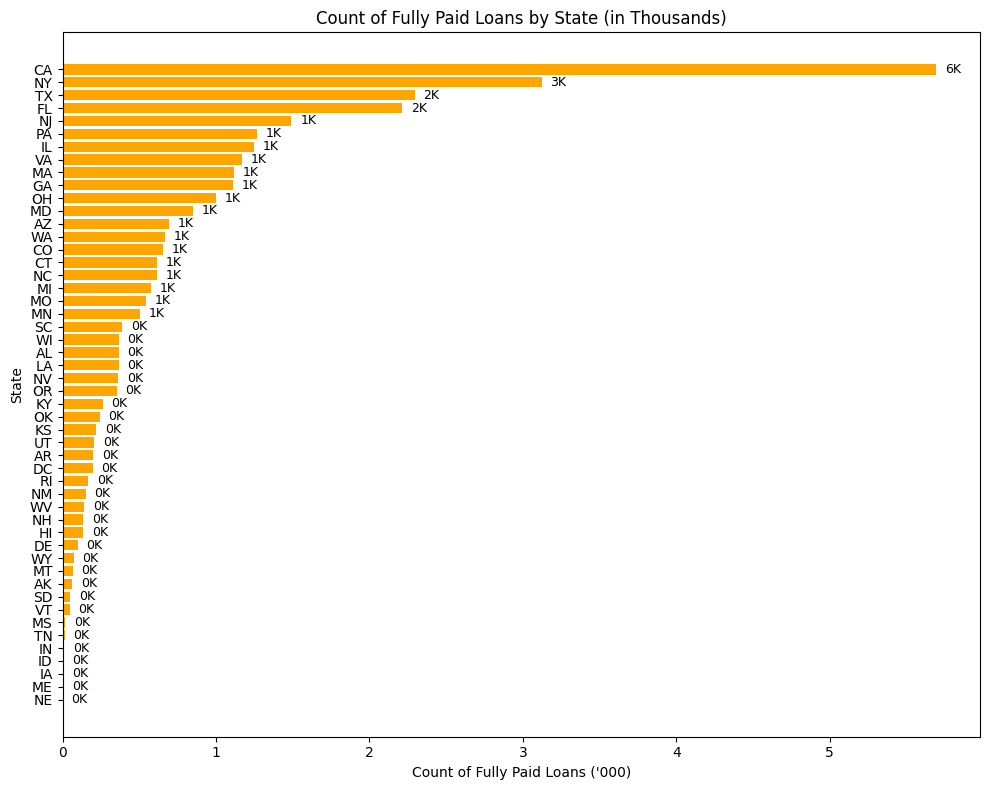

In [142]:
state_recovered_count = (
    df.groupby('address_state')['loan_status']
      .apply(lambda x: (x == "Fully Paid").sum())
      .sort_values(ascending=True)
)

state_recovered_count_thousands = state_recovered_count / 1000

plt.figure(figsize=(10, 8))
bars = plt.barh(state_recovered_count_thousands.index,
                state_recovered_count_thousands.values,
                color='orange')

# Relative offset (1% of max) for better scaling
offset = state_recovered_count_thousands.max() * 0.01

for bar in bars:
    width = bar.get_width()
    plt.text(width + offset,
             bar.get_y() + bar.get_height() / 2,
             f'{width:,.0f}K', va='center', fontsize=9)

plt.title('Count of Fully Paid Loans by State (in Thousands)')
plt.xlabel("Count of Fully Paid Loans ('000)")
plt.ylabel('State')
plt.tight_layout()
plt.show()


## Loan Term Analysis (Donut Chart)

### Loan Term Analysis by Funded Amount

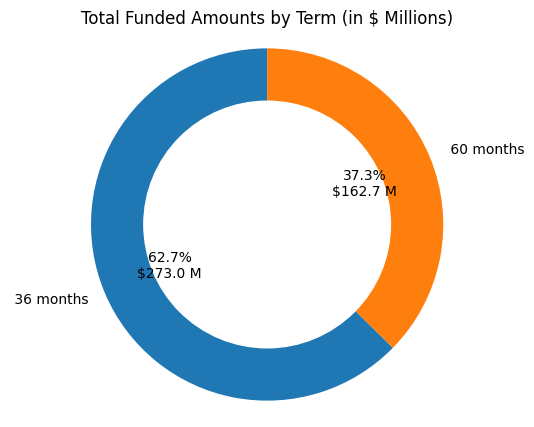

In [153]:
term_funding_millions = df.groupby('term')['loan_amount'].sum() / 1_000_000

plt.figure(figsize=(5,5))
plt.pie(term_funding_millions, 
    labels=term_funding_millions.index, 
    autopct= lambda p: f'{p:.1f}%\n${p*sum(term_funding_millions)/100:.1f} M' if p > 0 else '',
    startangle = 90,
    wedgeprops = {'width': 0.4}
    )
plt.gca().add_artist(plt.Circle((0, 0), 0.7, color='white', zorder=1))
plt.title('Total Funded Amounts by Term (in $ Millions)')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()


### Loan Term Analysis by Returned Amount

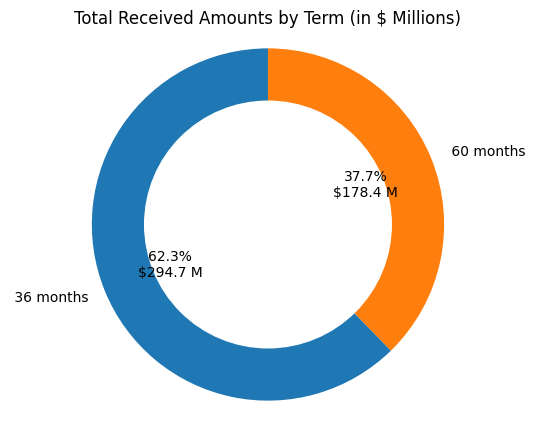

In [150]:
term_received_millions = df.groupby('term')['total_payment'].sum() / 1_000_000

plt.figure(figsize=(5,5))
plt.pie(term_received_millions, 
    labels=term_received_millions.index, 
    autopct= lambda p: f'{p:.1f}%\n${p*sum(term_received_millions)/100:.1f} M' if p > 0 else '',
    startangle = 90,
    wedgeprops = {'width': 0.4}
    )
plt.gca().add_artist(plt.Circle((0, 0), 0.7, color='white', zorder=1))
plt.title('Total Received Amounts by Term (in $ Millions)')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()


### Employee Length by Total Funded Amount

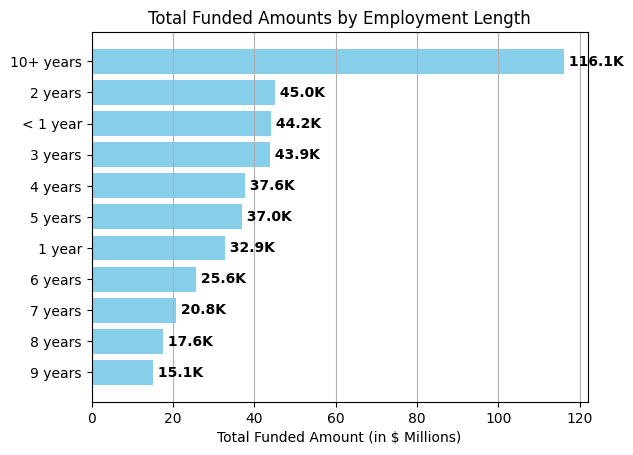

In [167]:
emp_funding = df.groupby('emp_length')['loan_amount'].sum().sort_values().div(1_000_000)

plt.barh(emp_funding.index, emp_funding.values, color='skyblue')
for index, value in enumerate(emp_funding.values):
    plt.text(value, index, f' {value:.1f}K', va='center', fontweight='bold')

plt.xlabel('Total Funded Amount (in $ Millions)')
plt.title('Total Funded Amounts by Employment Length')
plt.grid(axis='x')
plt.show()

### Employee Length by Total Returned Amount

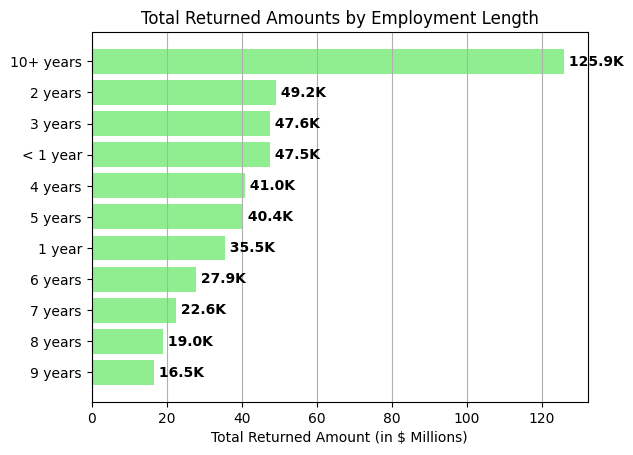

In [168]:
emp_returned = df.groupby('emp_length')['total_payment'].sum().sort_values().div(1_000_000)

plt.barh(emp_returned.index, emp_returned.values, color='lightgreen')
for index, value in enumerate(emp_returned.values):
    plt.text(value, index, f' {value:.1f}K', va='center', fontweight='bold')

plt.xlabel('Total Returned Amount (in $ Millions)')
plt.title('Total Returned Amounts by Employment Length')
plt.grid(axis='x')
plt.show()

### Loan Purpose by Total Funded Amount

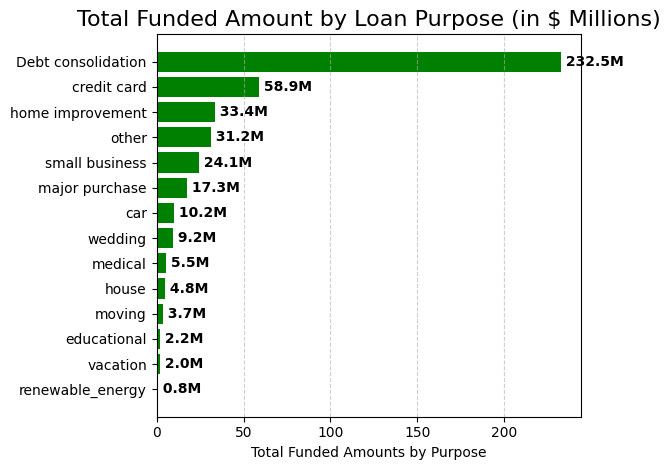

In [171]:
purpose_funding_millions = df.groupby('purpose')['loan_amount'].sum().sort_values().div(1_000_000)

plt.barh(purpose_funding_millions.index, purpose_funding_millions.values, color='green')
for index, value in enumerate(purpose_funding_millions.values):
    plt.text(value, index, f' {value:.1f}M', va='center', fontweight='bold')

plt.title('Total Funded Amount by Loan Purpose (in $ Millions)', fontsize = 16)
plt.xlabel('Total Funded Amounts by Purpose')
plt.grid(axis='x', linestyle = '--', alpha = 0.6)
plt.tight_layout()
plt.show()

### Loan Purpose by Total Returned Amount

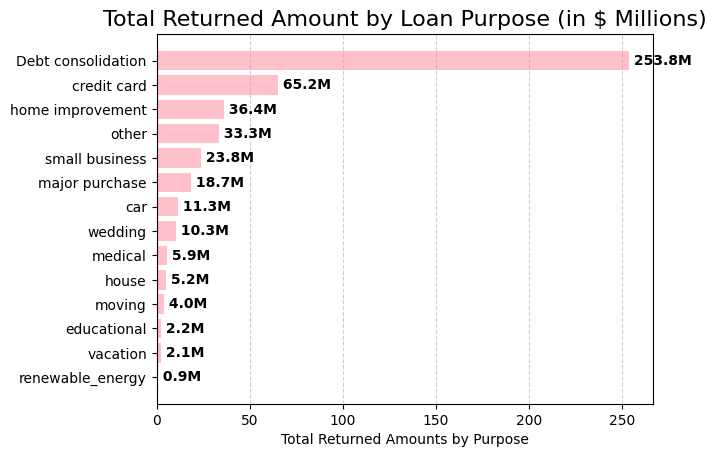

In [174]:
purpose_returned_millions = df.groupby('purpose')['total_payment'].sum().sort_values().div(1_000_000)

plt.barh(purpose_returned_millions.index, purpose_returned_millions.values, color='pink')
for index, value in enumerate(purpose_returned_millions.values):
    plt.text(value, index, f' {value:.1f}M', va='center', fontweight='bold')

plt.title('Total Returned Amount by Loan Purpose (in $ Millions)', fontsize = 16)
plt.xlabel('Total Returned Amounts by Purpose')
plt.grid(axis='x', linestyle = '--', alpha = 0.6)
plt.show()

### Home Ownership by Total FundedAmount

In [ ]:
home_funding = df.groupby('home_ownership')['loan_amount'].sum().reset_index()
home_funding['loan_amount_millions'] = home_funding['loan_amount'] / 1_000_000

fig = px.treemap(
                    home_funding, 
                    path=['home_ownership'], 
                    values='loan_amount_millions',
                    title='Total Funded Amount by Home Ownership (in $ Millions)'
                )

fig.show()

### Home Ownership by Total Returned Amount

In [177]:
home_returned = df.groupby('home_ownership')['total_payment'].sum().reset_index()
home_returned['loan_amount_millions'] = home_returned['total_payment'] / 1_000_000

fig = px.treemap(
                    home_returned, 
                    path=['home_ownership'], 
                    values='loan_amount_millions',
                    title='Total Returned Amount by Home Ownership (in $ Millions)'
                )

fig.show()